In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import sys
#reload(sys)
#sys.setdefaultencoding('UTF8')

%matplotlib inline

# Navent Dataset
### Analisis de las postulaciones del dataset de Navent

In [2]:
#cargo archivo csv de la educacion de los postulantes
p_educacion = pd.read_csv('../data/fiuba_1_postulantes_educacion.csv')
p_educacion.head()

,idpostulante,nombre,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


In [3]:
#cargo archivo csv del genero y edad de los postulantes
p_genero_edad = pd.read_csv('../data/fiuba_2_postulantes_genero_y_edad.csv')
p_genero_edad.head()

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


In [4]:
#cargo archivo csv de las vistas
visitas = pd.read_csv('../data/fiuba_3_vistas.csv')
visitas.head()

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP


In [5]:
#cargo csv de postulaciones
postulaciones = pd.read_csv('../data/fiuba_4_postulaciones.csv')
postulaciones.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [6]:
#cargo csv de avisos
avisos_online = pd.read_csv('../data/fiuba_5_avisos_online.csv')
avisos_online.head()

,idaviso
0,1112355872
1,1112335374
2,1112374842
3,1111984070
4,1111822480


In [7]:
#cargo csv de detalle de avisos
avisos_detalle = pd.read_csv('../data/fiuba_6_avisos_detalle.csv')
avisos_detalle.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


# Vista rapida de datos

In [8]:
avisos_detalle.shape

(13534, 11)

In [9]:
#columnas ciudad y mapacalle no deberian ser usadas, demasiados elementos null
avisos_detalle.isnull().sum()

idaviso                     0
idpais                      0
titulo                      0
descripcion                 0
nombre_zona                 0
ciudad                  13487
mapacalle               12662
tipo_de_trabajo             0
nivel_laboral               0
nombre_area                 0
denominacion_empresa        5
dtype: int64

In [10]:
avisos_detalle.info()

In [11]:
#dropeo las columnas con muchos null
avisos_detalle.drop('mapacalle', axis=1, inplace=True)
avisos_detalle.drop('ciudad', axis=1, inplace=True)

In [12]:
postulaciones.shape

(3401623, 3)

In [13]:
postulaciones.isnull().sum()

idaviso             0
idpostulante        0
fechapostulacion    0
dtype: int64

In [14]:
postulaciones.info()

In [15]:
visitas.shape

(961897, 3)

In [16]:
visitas.isnull().sum()

idAviso         0
timestamp       0
idpostulante    0
dtype: int64

In [17]:
visitas.info()

In [18]:
p_educacion.shape

(298231, 3)

In [19]:
p_educacion.isnull().sum()

idpostulante    0
nombre          0
estado          0
dtype: int64

In [20]:
p_educacion.info()

In [21]:
p_genero_edad.shape

(200888, 3)

In [22]:
p_genero_edad.isnull().sum()

idpostulante          0
fechanacimiento    4750
sexo                  0
dtype: int64

In [23]:
p_genero_edad.info()

# Limpieza de datos
En esta seccion limpiaremos los datos y los dejaremos preparados para el análisis. Los pasos a seguir son:
- Convertir las fechas de postulaciones a datetime
- Limpiar los espacios en blanco y Nan de las fechas de nacimiento de los postulantes
- Los null de mapacalle y ciudad ???

In [24]:
#Cambio la fecha a datetime
postulaciones['fechapostulacion'] = pd.to_datetime(postulaciones['fechapostulacion'])
print(postulaciones['fechapostulacion'].max())
print(postulaciones['fechapostulacion'].min())

In [25]:
postulaciones['fechapostulacion'].head()

0   2018-01-15 16:22:34
1   2018-02-06 09:04:50
2   2018-02-22 09:04:47
3   2018-02-22 09:04:59
4   2018-01-25 18:55:03
Name: fechapostulacion, dtype: datetime64[ns]

In [26]:
#Cambio timestamp a datetime
visitas['timestamp'] = pd.to_datetime(visitas['timestamp'])
print(visitas['timestamp'].max())
print(visitas['timestamp'].min())

In [27]:
visitas['timestamp'].head()

0   2018-02-23 18:38:13.187
1   2018-02-23 18:38:14.296
2   2018-02-23 18:38:14.329
3   2018-02-23 18:38:17.921
4   2018-02-23 18:38:18.973
Name: timestamp, dtype: datetime64[ns]

In [28]:
#vemos que hay fechas vacias
for x in p_genero_edad['fechanacimiento'].drop_duplicates():
    print ([x])

In [29]:
#p_edad=p_genero_edad[['fechanacimiento','idpostulante']]
#separo en dos dataframes para poder utilizar datos del sexo que se perderian si dropeamos junto con las fechas invalidas
#p_edad=p_genero_edad.loc[:,('fechanacimiento','idpostulante')]
#p_genero=p_genero_edad.loc[:,('sexo','idpostulante')]
print(len(p_genero_edad))
p_genero_edad.dropna(inplace=True)
print(len(p_genero_edad))

In [30]:
#siguen habiendo años invalidos
p_genero_edad.sort_values('fechanacimiento',ascending=False)

,fechanacimiento,idpostulante
6869,2006-01-01,a5qWAm
194568,2000-12-31,5mP3orv
183772,2000-12-28,MVr1ker
175622,2000-12-27,pzd1dWp
199353,2000-12-12,wVkMXLd
197716,2000-12-07,4rP34ME
200472,2000-11-28,Yj5BABV
180673,2000-11-27,3NPVAwq
192688,2000-11-26,2zP3AE6
174690,2000-11-07,akjWA80


In [31]:
#me quedo con los años validos
p_genero_edad = p_genero_edad[(p_genero_edad['fechanacimiento'].str.startswith('19'))| (p_genero_edad['fechanacimiento'].str.startswith('20'))]

In [32]:
#veo que los años que empezaban en 00 no estan mas
p_genero_edad.sort_values('fechanacimiento',ascending=True).head()

,fechanacimiento,idpostulante
6869,2006-01-01,a5qWAm
194568,2000-12-31,5mP3orv
183772,2000-12-28,MVr1ker
175622,2000-12-27,pzd1dWp
199353,2000-12-12,wVkMXLd
197716,2000-12-07,4rP34ME
200472,2000-11-28,Yj5BABV
180673,2000-11-27,3NPVAwq
192688,2000-11-26,2zP3AE6
174690,2000-11-07,akjWA80


In [33]:
#calculo la edad de los postulantes
p_genero_edad['edad'] = pd.to_datetime('today').year-pd.to_datetime(p_genero_edad['fechanacimiento']).dt.year
p_genero_edad.head()

,fechanacimiento,idpostulante,edad
0,1970-12-03,NM5M,48
1,1962-12-04,5awk,56
2,1978-08-10,ZaO5,40
3,1969-05-09,NdJl,49
4,1981-02-16,eo2p,37
5,1968-12-18,Ez8J,50
6,1966-07-16,aOQq,52
7,1976-07-21,8BkL,42
8,1976-02-28,1d2B,42
9,1981-03-09,NPBx,37


In [ ]:
p_genero_edad['edad'] = pd.to_datetime('today').year-pd.to_datetime(p_genero_edad['fechanacimiento']).dt.year
p_genero_edad.head()

In [ ]:
gen_edad_validos=p_genero_edad.drop('fechanacimiento',axis=1)

In [36]:
#aca me parece que habria que limpiar un poco los datos porque en educacion se repiten los id de postulante
#porque hay postulantes que aparecen varias veces con distintos estados de educacion
postulantes = pd.merge(p_educacion,p_genero_edad_validos,on="idpostulante",how="outer")
postulantes.head()

,idpostulante,nombre,estado,sexo,fechanacimiento,edad
0,NdJl,Posgrado,En Curso,MASC,1969-05-09,49.0
1,NdJl,Universitario,Graduado,MASC,1969-05-09,49.0
2,8BkL,Universitario,En Curso,FEM,1976-07-21,42.0
3,8BkL,Universitario,Graduado,FEM,1976-07-21,42.0
4,8BkL,Posgrado,Graduado,FEM,1976-07-21,42.0


# Datos sobre niveles de educacion

In [37]:
#cantidad de postulantes agrupado por nivel de educación
#usando el p_educacion estariamos tomando a cada postulante como varios si es que tiene mas de un estado de educacion
p_educacion.groupby('nombre').agg({'idpostulante':'count'}).sort_values('idpostulante',ascending=False)\
                                            .rename(columns={"idpostulante": "cantidad_postulantes"})

,cantidad_postulantes
nombre,
Secundario,110256
Universitario,104295
Terciario/Técnico,47733
Otro,24748
Posgrado,7387
Master,3598
Doctorado,214


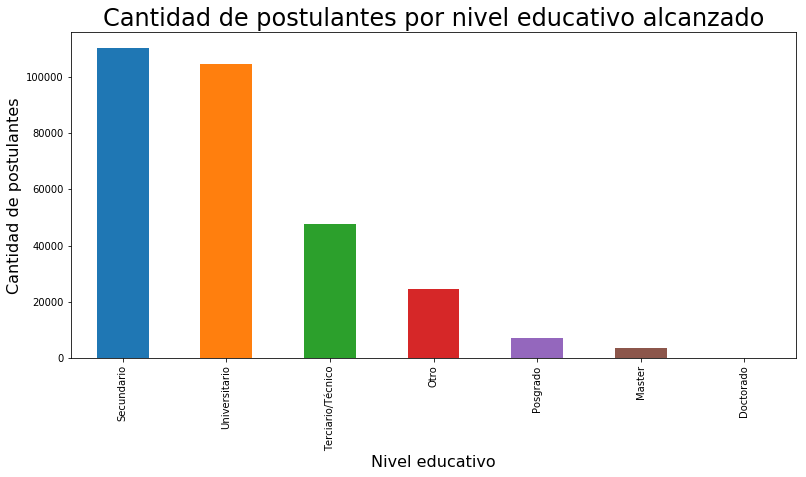

In [38]:
fig = plt.figure()

ax = p_educacion['nombre'].value_counts().plot(kind='bar',figsize=(13,6));

plt.title('Cantidad de postulantes por nivel educativo alcanzado', fontsize=24)

ax.set_xlabel('Nivel educativo', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

In [39]:
p_educacion['estado'].value_counts()

Graduado      194474
En Curso       78531
Abandonado     25226
Name: estado, dtype: int64

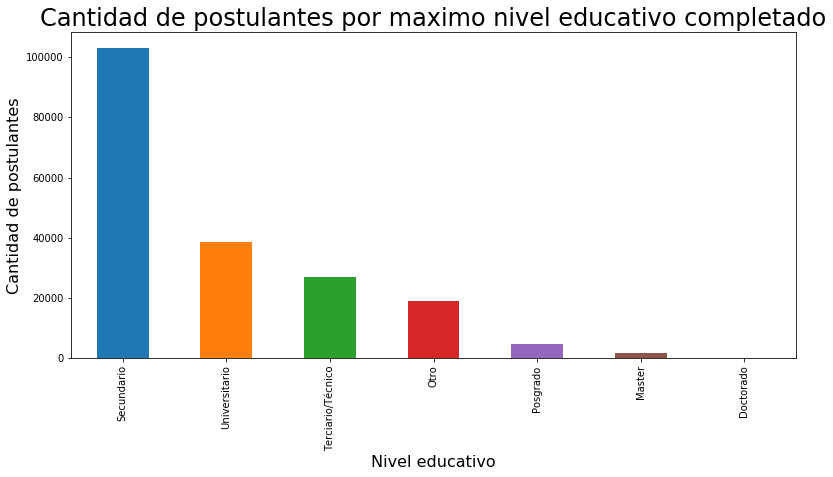

In [40]:
filtered = p_educacion.loc[(p_educacion.estado=='Graduado')]

fig = plt.figure()

ax = filtered['nombre'].value_counts().plot(kind='bar',figsize=(13,6));

plt.title('Cantidad de postulantes por maximo nivel educativo completado', fontsize=24)

ax.set_xlabel('Nivel educativo', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

In [41]:
#¿Cuáles son los niveles de estudio con mayor desercion?
#Creo que esto no es muy relevante. Al menos para navent
#Tal vez renombrarlo como "cantidad de postulantes segun el nivel de estudio abandonado o algo asi"
filtered = p_educacion.loc[(p_educacion.estado=='Abandonado')]

filtered['nombre'].value_counts()

Universitario        14955
Terciario/Técnico     5692
Secundario            3156
Otro                   947
Posgrado               317
Master                 144
Doctorado               15
Name: nombre, dtype: int64

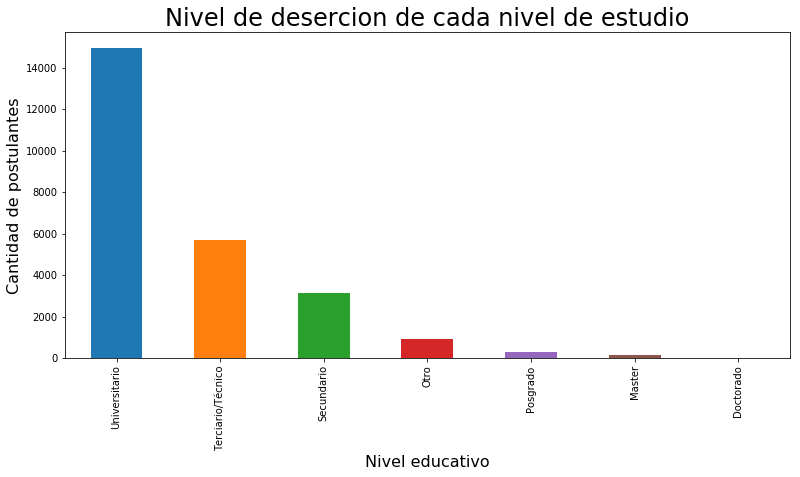

In [42]:
fig = plt.figure()

ax = filtered['nombre'].value_counts().plot(kind='bar',figsize=(13,6));

plt.title('Nivel de desercion de cada nivel de estudio', fontsize=24)

ax.set_xlabel('Nivel educativo', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

In [43]:
#¿Cuales son los niveles de estudio con mayor numero de estudiantes que se postulan?
filtered = p_educacion.loc[(p_educacion.estado=='En Curso')]

filtered['nombre'].value_counts()

Universitario        50733
Terciario/Técnico    15032
Otro                  4919
Secundario            3995
Posgrado              2239
Master                1519
Doctorado               94
Name: nombre, dtype: int64

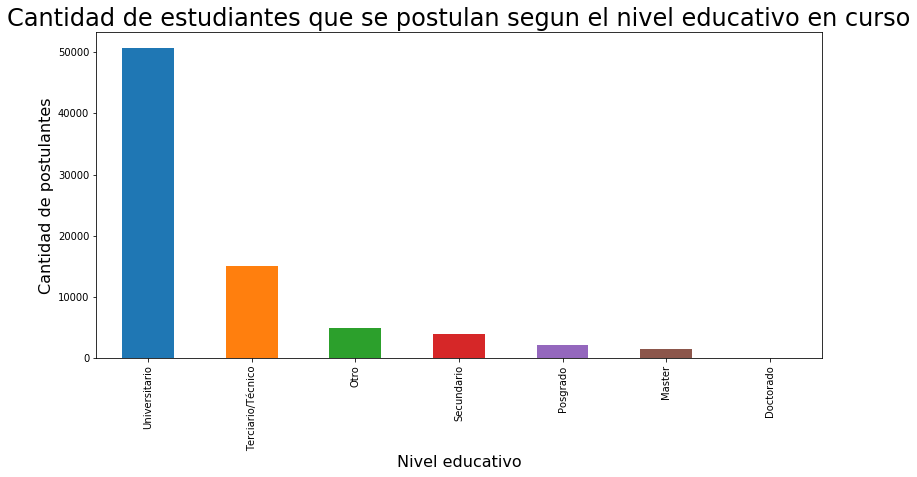

In [44]:
fig = plt.figure()

ax = filtered['nombre'].value_counts().plot(kind='bar',figsize=(13,6));

plt.title('Cantidad de estudiantes que se postulan segun el nivel educativo en curso', fontsize=24)

ax.set_xlabel('Nivel educativo', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

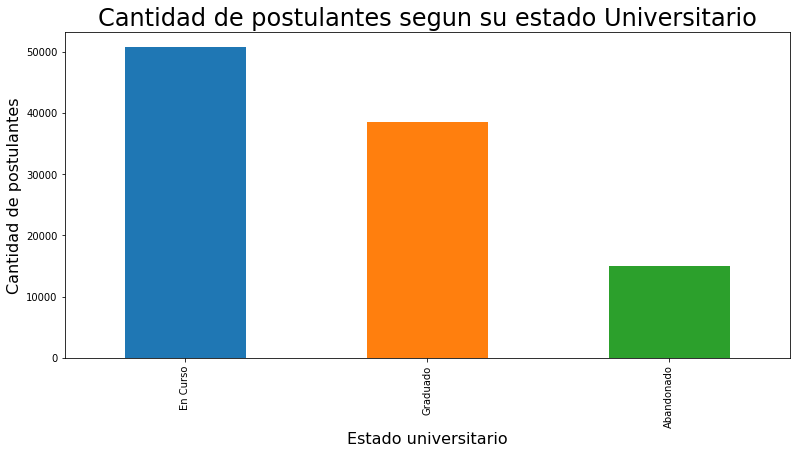

In [45]:
filtered = p_educacion.loc[(p_educacion.nombre=='Universitario')]

fig = plt.figure()

ax = filtered['estado'].value_counts().plot(kind='bar',figsize=(13,6));

plt.title('Cantidad de postulantes segun su estado Universitario', fontsize=24)

ax.set_xlabel('Estado universitario', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

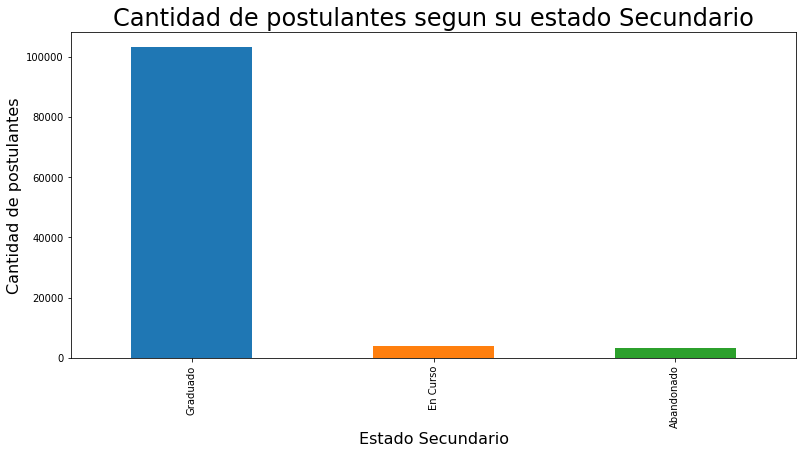

In [46]:
filtered = p_educacion.loc[(p_educacion.nombre=='Secundario')]

fig = plt.figure()

ax = filtered['estado'].value_counts().plot(kind='bar',figsize=(13,6));

plt.title('Cantidad de postulantes segun su estado Secundario', fontsize=24)

ax.set_xlabel('Estado Secundario', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

Text(0,0.5,'Cantidad de postulantes')

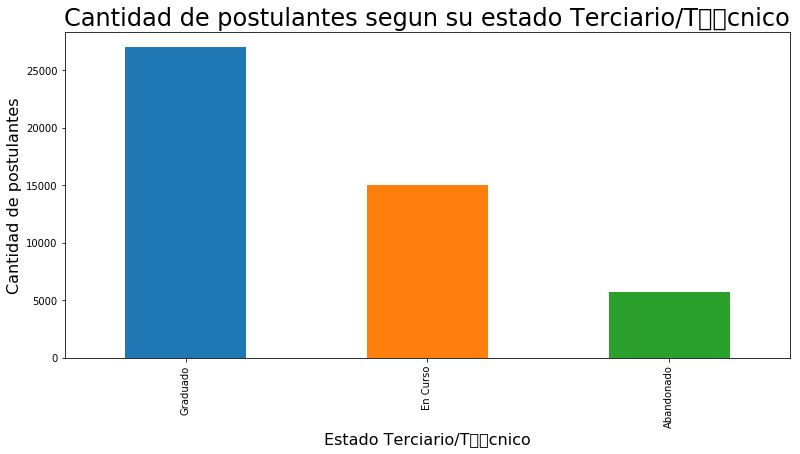

In [47]:
#se podrian graficar para los demas niveles de estudio pero no me parecieron tan relevantes por la cantidad de datos que habia
filtered = p_educacion.loc[(p_educacion.nombre=='Terciario/Técnico')]

fig = plt.figure()

ax = filtered['estado'].value_counts().plot(kind='bar',figsize=(13,6));

plt.title('Cantidad de postulantes segun su estado Terciario/Técnico', fontsize=24)

ax.set_xlabel('Estado Terciario/Técnico', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16)

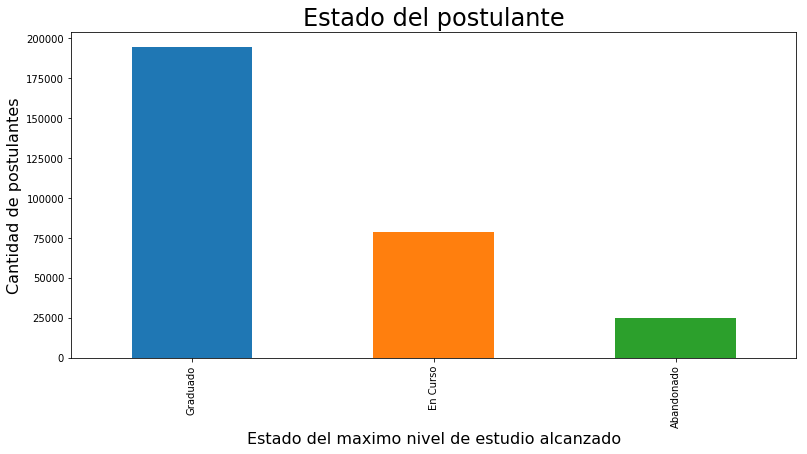

In [48]:
#este creo que tampoco es muy relevante

fig = plt.figure()

ax = p_educacion['estado'].value_counts().plot(kind='bar',figsize=(13,6));

plt.title('Estado del postulante', fontsize=24)

ax.set_xlabel('Estado del maximo nivel de estudio alcanzado', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

# Datos segun genero y edad

In [49]:
p_genero['sexo'].value_counts()

FEM           101981
MASC           94339
NO_DECLARA      4568
Name: sexo, dtype: int64

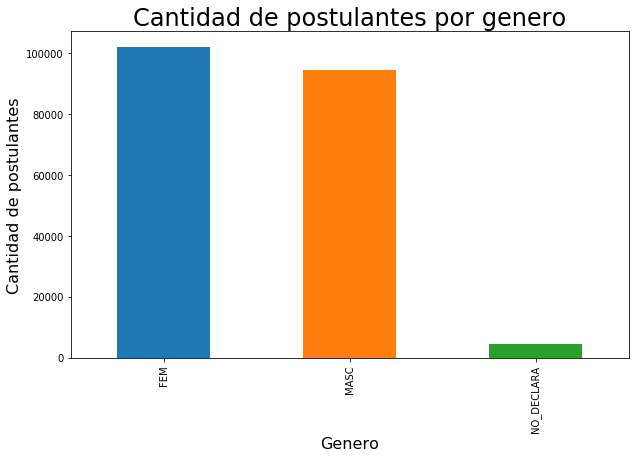

In [50]:
fig = plt.figure()

ax = p_genero['sexo'].value_counts().plot(kind='bar',figsize=(10,6));

plt.title('Cantidad de postulantes por genero', fontsize=24)

ax.set_xlabel('Genero', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

In [51]:
#calculo la edad de los postulantes
p_edad['edad'] = pd.to_datetime('today').year-pd.to_datetime(p_edad['fechanacimiento']).dt.year

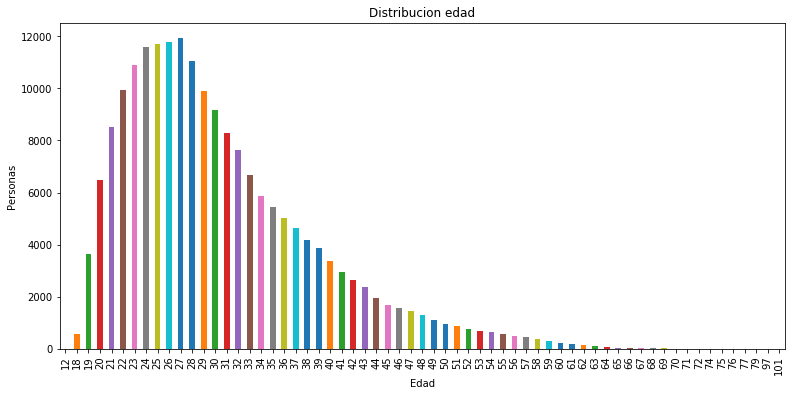

In [52]:
#p_edad = p_edad[(p_edad['edad'] <= 65) & (p_edad['edad'] >= 18)]
#deje todas las edades pero se pueden reducir con la linea de arriba
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Distribucion edad')
ax.set_xlabel('Edad')
ax.set_ylabel('Personas')
p_edad['edad'].value_counts().sort_index().plot(kind='bar',figsize=(13,6))
plt.show()

In [53]:
print(p_edad['edad'].max())
print(p_edad['edad'].min())

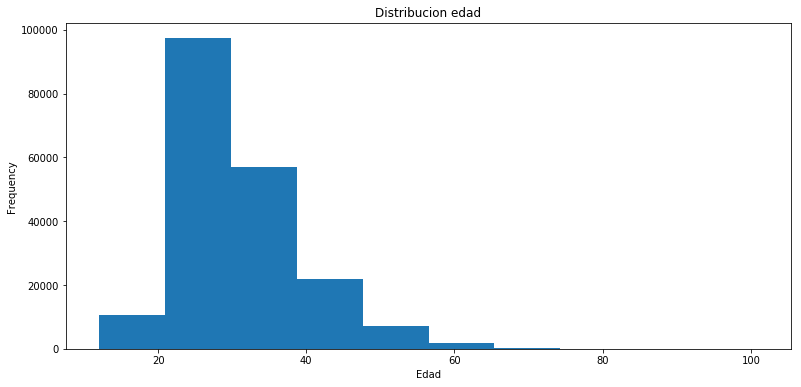

In [54]:
#elegir uno de los dos siguientes histogramas
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Distribucion edad')
ax.set_xlabel('Edad')
p_edad['edad'].plot(kind='hist',figsize=(13,6))
plt.show()

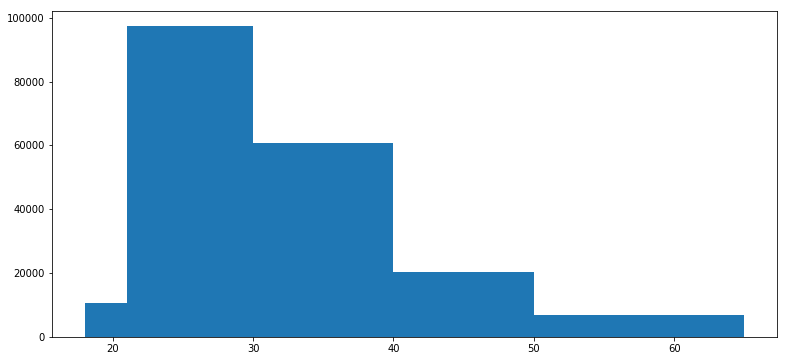

In [55]:
fig = plt.figure(figsize = (13,6))

anios = [18, 21, 30, 40, 50 , 65]

plt.hist(p_edad['edad'], anios)

plt.show()

# Datos de avisos

In [56]:
print(avisos_detalle['tipo_de_trabajo'].unique())

In [57]:
#cantidad de avisos por tipo de trabajo (full time, part time...)
avisos_detalle.groupby('tipo_de_trabajo').agg({'tipo_de_trabajo':'count'}).sort_values('tipo_de_trabajo',ascending=False)\
                .rename(columns={"tipo_de_trabajo": "cantidad_avisos"})

,cantidad_avisos
tipo_de_trabajo,
Full-time,12339
Part-time,863
Teletrabajo,110
Pasantia,63
Por Horas,63
Temporario,42
Por Contrato,37
Fines de Semana,14
Primer empleo,3


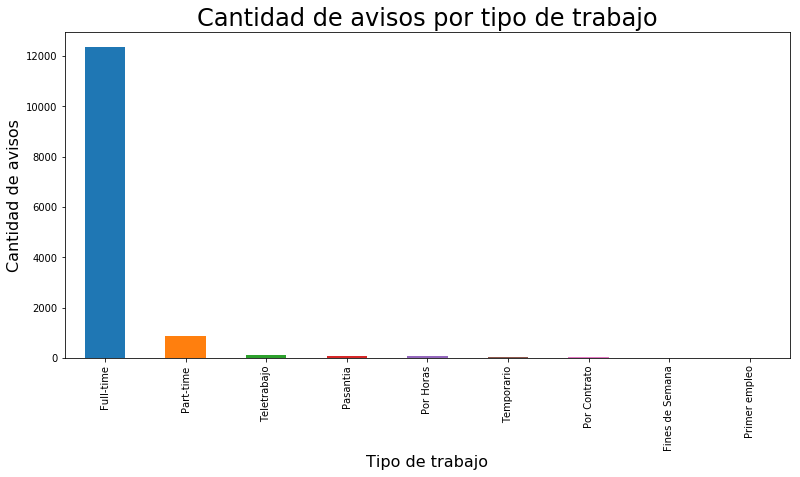

In [58]:
fig = plt.figure()

ax = avisos_detalle['tipo_de_trabajo'].value_counts().plot(kind='bar',figsize=(13,6));

plt.title('Cantidad de avisos por tipo de trabajo', fontsize=24)

ax.set_xlabel('Tipo de trabajo', fontsize= 16)
ax.set_ylabel('Cantidad de avisos', fontsize= 16);

In [59]:
#empresas con mayor cantidad de avisos
avisos_detalle.groupby('denominacion_empresa').agg({'denominacion_empresa':'size'}).sort_values('denominacion_empresa',ascending=False)\
                      .rename(columns={"denominacion_empresa": "cantidad_avisos"})      

,cantidad_avisos
denominacion_empresa,
RANDSTAD,562
Manpower,422
Grupo Gestión,383
Assistem,289
SOLUTIX S.A.,260
BAYTON,238
Pullmen Servicios Empresarios S.A.,229
Adecco - Región NORTE & OESTE GBA,205
Suministra,203


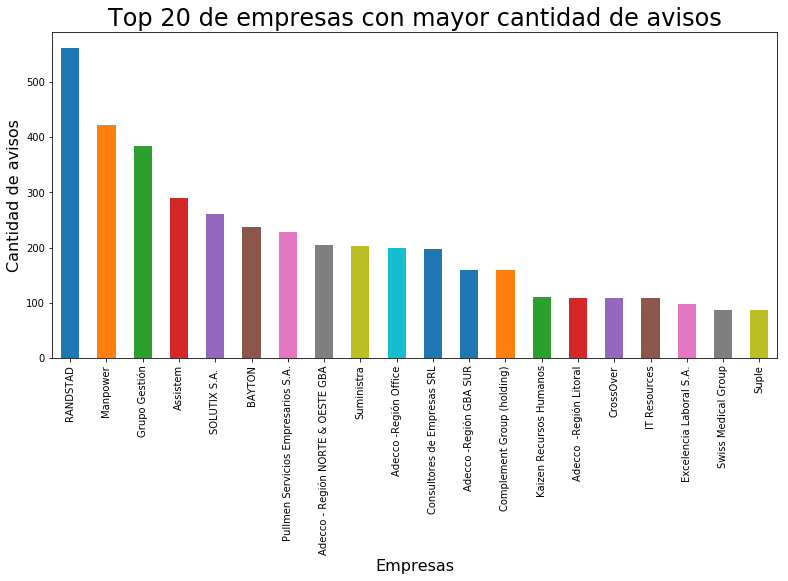

In [60]:
fig = plt.figure()

ax = avisos_detalle['denominacion_empresa'].value_counts().head(20).plot(kind='bar',figsize=(13,6));

plt.title('Top 20 de empresas con mayor cantidad de avisos', fontsize=24)

ax.set_xlabel('Empresas', fontsize= 16)
ax.set_ylabel('Cantidad de avisos', fontsize= 16);

In [61]:
#Zonas con mayor cantidad de avisos
avisos_detalle.groupby('nombre_zona').agg({'nombre_zona':'size'}).sort_values('nombre_zona',ascending=False)\
                      .rename(columns={"nombre_zona": "cantidad_avisos"})   

,cantidad_avisos
nombre_zona,
Gran Buenos Aires,12654
Capital Federal,876
Buenos Aires (fuera de GBA),2
GBA Oeste,2


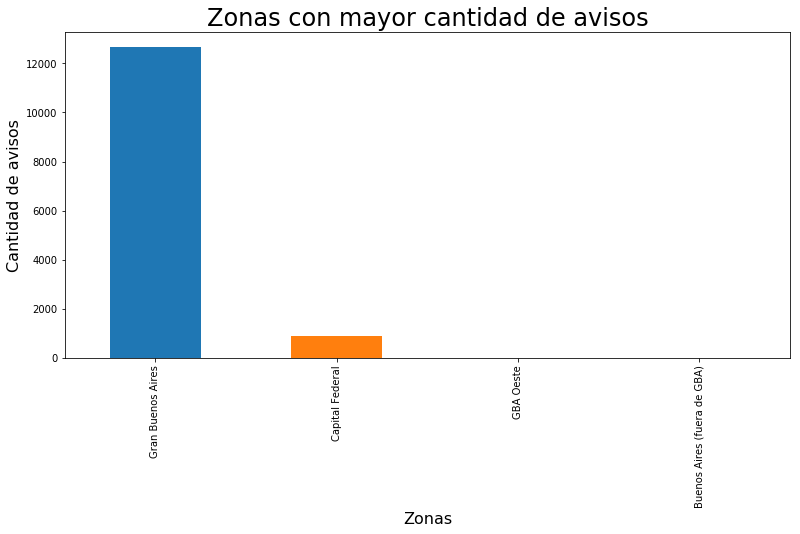

In [62]:
fig = plt.figure()

ax = avisos_detalle['nombre_zona'].value_counts().head(20).plot(kind='bar',figsize=(13,6));

plt.title('Zonas con mayor cantidad de avisos', fontsize=24)

ax.set_xlabel('Zonas', fontsize= 16)
ax.set_ylabel('Cantidad de avisos', fontsize= 16);

In [63]:
#Areas con mayor cantidad de avisos
avisos_detalle.groupby('nombre_area').agg({'nombre_area':'size'}).sort_values('nombre_area',ascending=False)\
                      .rename(columns={"nombre_area": "cantidad_avisos"})   

,cantidad_avisos
nombre_area,
Ventas,1659
Comercial,983
Administración,901
Producción,821
Programación,576
Contabilidad,416
Tecnologia / Sistemas,388
Atención al Cliente,347
Mantenimiento,324


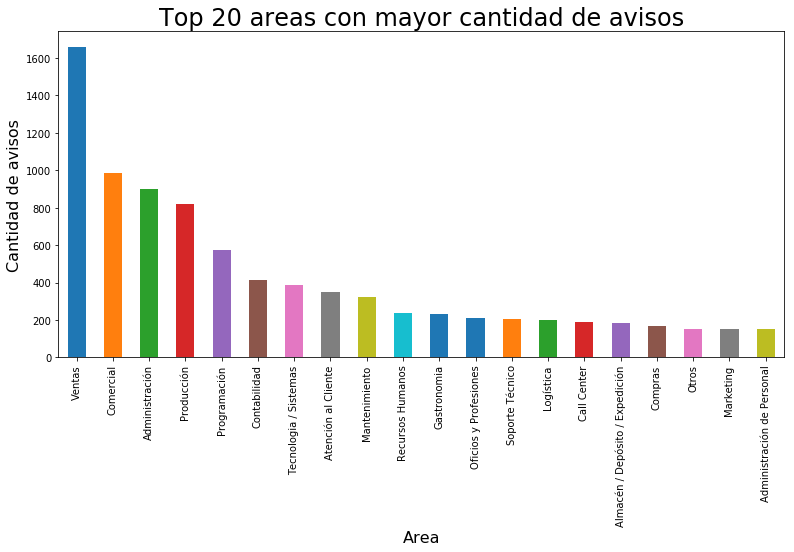

In [64]:
fig = plt.figure()

ax = avisos_detalle['nombre_area'].value_counts().head(20).plot(kind='bar',figsize=(13,6));

plt.title('Top 20 areas con mayor cantidad de avisos', fontsize=24)

ax.set_xlabel('Area', fontsize= 16)
ax.set_ylabel('Cantidad de avisos', fontsize= 16);

In [65]:
#Nivel laboral con mayor cantidad de avisos
avisos_detalle.groupby('nivel_laboral').agg({'nivel_laboral':'size'}).sort_values('nivel_laboral',ascending=False)\
                      .rename(columns={"nivel_laboral": "cantidad_avisos"})  

,cantidad_avisos
nivel_laboral,
Senior / Semi-Senior,9407
Junior,2216
Otro,921
Jefe / Supervisor / Responsable,809
Gerencia / Alta Gerencia / Dirección,181


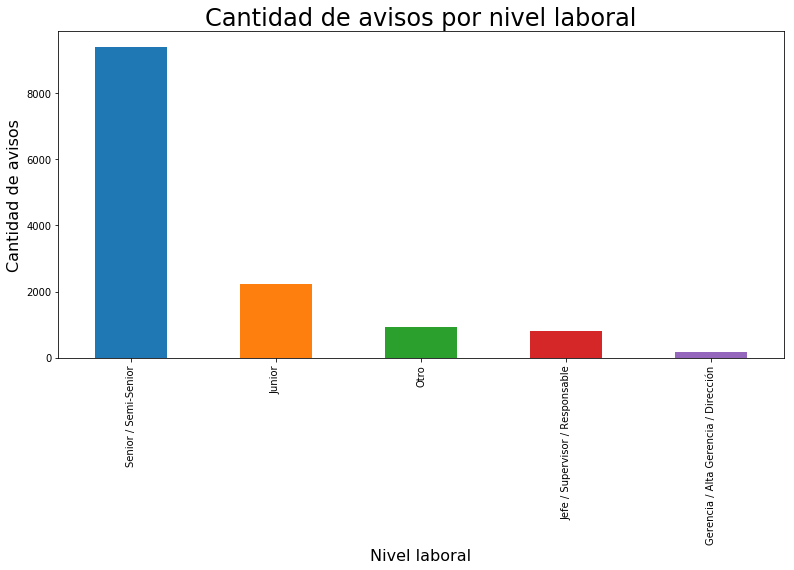

In [66]:
fig = plt.figure()

ax = avisos_detalle['nivel_laboral'].value_counts().plot(kind='bar',figsize=(13,6));

plt.title('Cantidad de avisos por nivel laboral', fontsize=24)

ax.set_xlabel('Nivel laboral', fontsize= 16)
ax.set_ylabel('Cantidad de avisos', fontsize= 16);

# Postulaciones por dia de semana 

In [67]:
postulaciones['dia_semana'] = postulaciones['fechapostulacion'].dt.weekday_name

In [68]:
postulaciones.head()

,idaviso,idpostulante,fechapostulacion,dia_semana
0,1112257047,NM5M,2018-01-15 16:22:34,Monday
1,1111920714,NM5M,2018-02-06 09:04:50,Tuesday
2,1112346945,NM5M,2018-02-22 09:04:47,Thursday
3,1112345547,NM5M,2018-02-22 09:04:59,Thursday
4,1112237522,5awk,2018-01-25 18:55:03,Thursday


In [70]:
postulaciones['dia_semana'].value_counts()

Wednesday    677836
Monday       668310
Tuesday      658428
Thursday     506163
Friday       446698
Sunday       226857
Saturday     217331
Name: dia_semana, dtype: int64

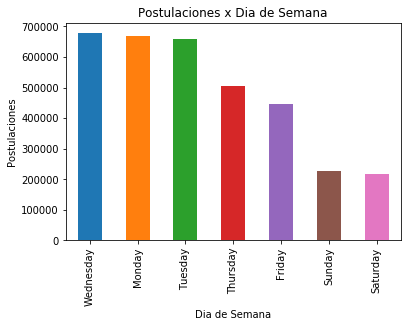

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Postulaciones x Dia de Semana')
ax.set_xlabel('Dia de Semana')
ax.set_ylabel('Postulaciones')
#dt.weekday.value_counts().sort_index() 
postulaciones['dia_semana'].value_counts().plot(kind='bar')
plt.show()

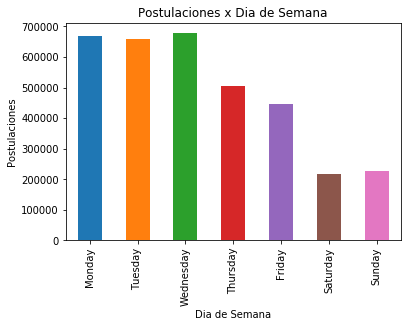

In [73]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Postulaciones x Dia de Semana')
ax.set_xlabel('Dia de Semana')
ax.set_ylabel('Postulaciones')
postulaciones['dia_semana'].value_counts().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).plot(kind='bar')
plt.show()

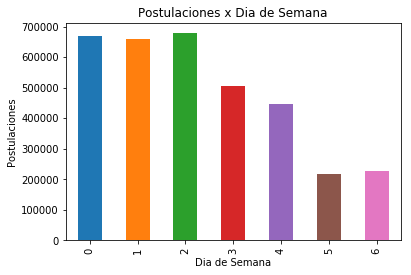

In [74]:
#este habria que cambiar los numeros por los nombres de los dias
#o en el de arriba lograr que los dias queden ordenados
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Postulaciones x Dia de Semana')
ax.set_xlabel('Dia de Semana')
ax.set_ylabel('Postulaciones')
#dt.weekday.value_counts().sort_index() 
postulaciones['fechapostulacion'].dt.weekday.value_counts().sort_index().plot(kind='bar')

plt.show()

In [75]:
postulaciones.head()

,idaviso,idpostulante,fechapostulacion,dia_semana
0,1112257047,NM5M,2018-01-15 16:22:34,Monday
1,1111920714,NM5M,2018-02-06 09:04:50,Tuesday
2,1112346945,NM5M,2018-02-22 09:04:47,Thursday
3,1112345547,NM5M,2018-02-22 09:04:59,Thursday
4,1112237522,5awk,2018-01-25 18:55:03,Thursday


# Postulaciones por dia del mes

In [76]:
#Postulaciones enero
postulaciones_dia_mes = postulaciones[postulaciones['fechapostulacion'] < '02-01-2018']

In [77]:
postulaciones_dia_mes.head()

,idaviso,idpostulante,fechapostulacion,dia_semana
0,1112257047,NM5M,2018-01-15 16:22:34,Monday
4,1112237522,5awk,2018-01-25 18:55:03,Thursday
5,1112277633,5awk,2018-01-29 13:34:44,Monday
20,1112286523,ZaO5,2018-01-24 15:07:39,Wednesday
21,1112272060,ZaO5,2018-01-24 15:20:10,Wednesday


In [78]:
postulaciones_dia_mes['dia_mes'] = postulaciones_dia_mes.loc[:,'fechapostulacion'].dt.day

In [79]:
postulaciones_dia_mes.head()

,idaviso,idpostulante,fechapostulacion,dia_semana,dia_mes
0,1112257047,NM5M,2018-01-15 16:22:34,Monday,15
4,1112237522,5awk,2018-01-25 18:55:03,Thursday,25
5,1112277633,5awk,2018-01-29 13:34:44,Monday,29
20,1112286523,ZaO5,2018-01-24 15:07:39,Wednesday,24
21,1112272060,ZaO5,2018-01-24 15:20:10,Wednesday,24


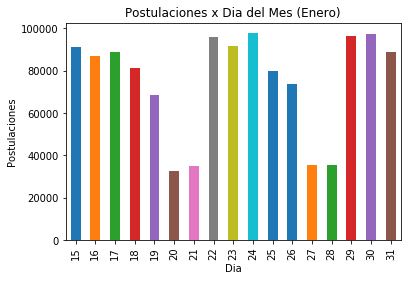

In [80]:
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('Postulaciones x Dia del Mes (Enero)')
ax.set_xlabel('Dia')
ax.set_ylabel('Postulaciones')
postulaciones_dia_mes['dia_mes'].value_counts().sort_index().plot(kind='bar')

plt.show()

In [81]:
#Postulaciones febrero
postulaciones_dia_mes = postulaciones[postulaciones['fechapostulacion'] >= '02-01-2018']

In [82]:
postulaciones_dia_mes.head()

,idaviso,idpostulante,fechapostulacion,dia_semana
1,1111920714,NM5M,2018-02-06 09:04:50,Tuesday
2,1112346945,NM5M,2018-02-22 09:04:47,Thursday
3,1112345547,NM5M,2018-02-22 09:04:59,Thursday
6,1112302347,5awk,2018-02-07 20:49:22,Wednesday
7,1112291495,5awk,2018-02-07 20:50:13,Wednesday


In [83]:
postulaciones_dia_mes['dia_mes'] = postulaciones_dia_mes['fechapostulacion'].dt.day

In [84]:
postulaciones_dia_mes.head()

,idaviso,idpostulante,fechapostulacion,dia_semana,dia_mes
1,1111920714,NM5M,2018-02-06 09:04:50,Tuesday,6
2,1112346945,NM5M,2018-02-22 09:04:47,Thursday,22
3,1112345547,NM5M,2018-02-22 09:04:59,Thursday,22
6,1112302347,5awk,2018-02-07 20:49:22,Wednesday,7
7,1112291495,5awk,2018-02-07 20:50:13,Wednesday,7


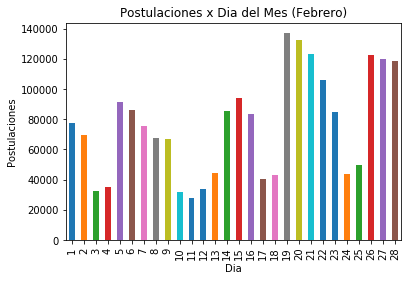

In [85]:
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('Postulaciones x Dia del Mes (Febrero)')
ax.set_xlabel('Dia')
ax.set_ylabel('Postulaciones')
postulaciones_dia_mes['dia_mes'].value_counts().sort_index().plot(kind='bar')

plt.show()

# Postulaciones por mes

In [86]:
postulaciones['mes_postulacion']=postulaciones['fechapostulacion'].dt.month
postulaciones.head()

,idaviso,idpostulante,fechapostulacion,dia_semana,mes_postulacion
0,1112257047,NM5M,2018-01-15 16:22:34,Monday,1
1,1111920714,NM5M,2018-02-06 09:04:50,Tuesday,2
2,1112346945,NM5M,2018-02-22 09:04:47,Thursday,2
3,1112345547,NM5M,2018-02-22 09:04:59,Thursday,2
4,1112237522,5awk,2018-01-25 18:55:03,Thursday,1


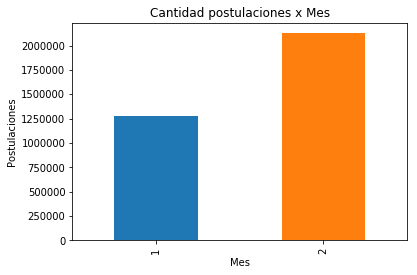

In [87]:
#con estos datos capaz se podrian hacer otro graficos mas copados
#cambiar 1 y 2 por enero y febrero
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('Cantidad postulaciones x Mes')
ax.set_xlabel('Mes')
ax.set_ylabel('Postulaciones')
postulaciones['mes_postulacion'].value_counts().sort_index().plot(kind='bar')

plt.show()

# Postulaciones por franja horaria

In [88]:
postulaciones['fechapostulacion'].dt.hour.value_counts()

9     274827
10    257280
8     236547
11    233871
13    220999
12    220434
14    215492
15    196633
16    181334
17    170380
7     167661
18    158875
19    145853
20    135252
21    126107
22    106293
6     104569
23     74510
5      50375
0      44981
1      27342
4      20382
2      17336
3      14290
Name: fechapostulacion, dtype: int64

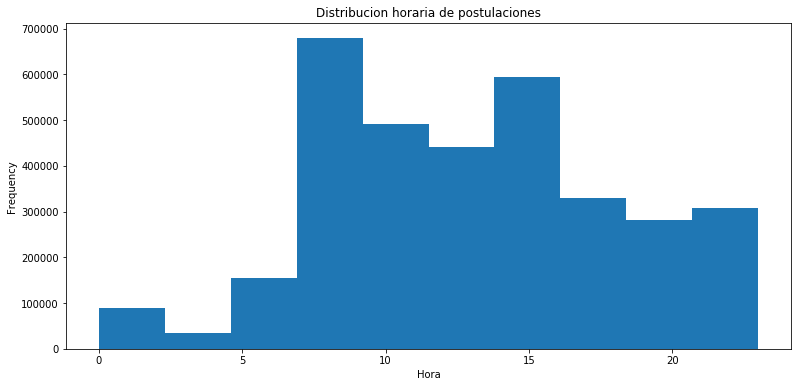

In [89]:
#capaz es mejor otro grafico para esto
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Distribucion horaria de postulaciones')
ax.set_xlabel('Hora')
postulaciones['fechapostulacion'].dt.hour.plot(kind='hist',figsize=(13,6))

plt.show()

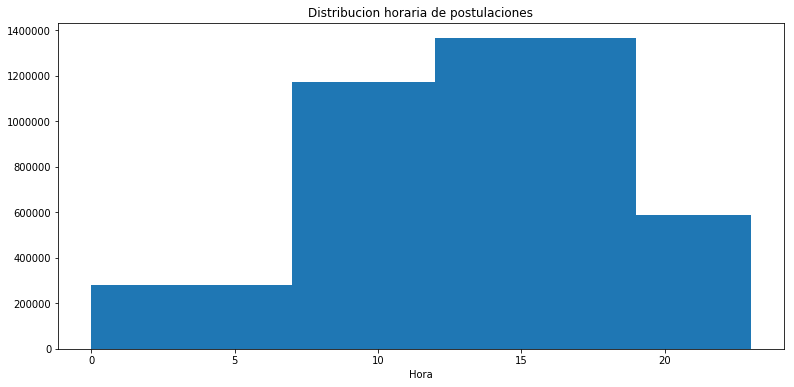

In [90]:
#es igual al de arriba solo que le cambie las franjas
fig = plt.figure(figsize = (13,6))
ax = fig.add_subplot(111)
plt.title('Distribucion horaria de postulaciones')
ax.set_xlabel('Hora')
franjas = [0,7, 12, 19, 23]
plt.hist(postulaciones['fechapostulacion'].dt.hour, franjas)

plt.show()

# Datos de vistas

In [91]:
visitas.head()

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23 18:38:13.187,YjVJQ6Z
1,1112263876,2018-02-23 18:38:14.296,BmVpYoR
2,1112327963,2018-02-23 18:38:14.329,wVkBzZd
3,1112318643,2018-02-23 18:38:17.921,OqmP9pv
4,1111903673,2018-02-23 18:38:18.973,DrpbXDP


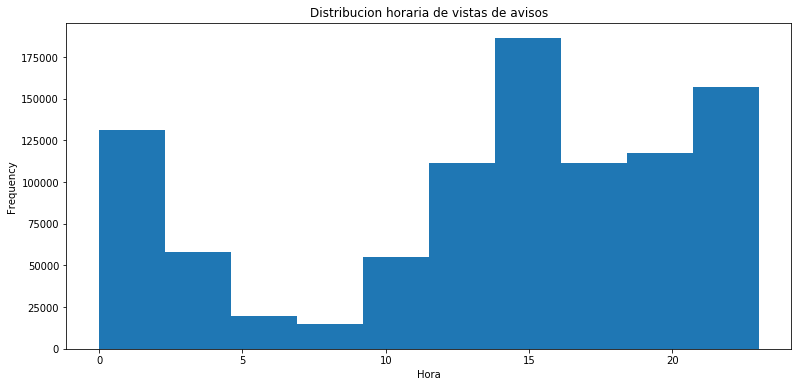

In [92]:
#capaz es mejor otro grafico para esto
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Distribucion horaria de vistas de avisos')
ax.set_xlabel('Hora')
visitas['timestamp'].dt.hour.plot(kind='hist',figsize=(13,6))

plt.show()

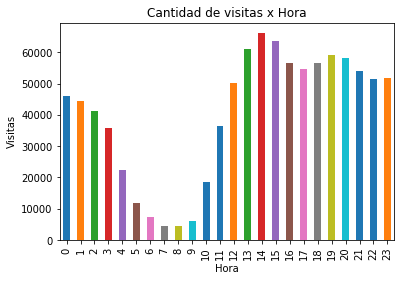

In [93]:
#lo mismo que el anterior pero por cada hora
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('Cantidad de visitas x Hora')
ax.set_xlabel('Hora')
ax.set_ylabel('Visitas')
visitas['timestamp'].dt.hour.value_counts().sort_index().plot(kind='bar')

plt.show()

In [94]:
visitas['timestamp'].dt.month.value_counts()

2    921074
3     40823
Name: timestamp, dtype: int64

In [95]:
print(visitas['timestamp'].min())
print(visitas['timestamp'].max())

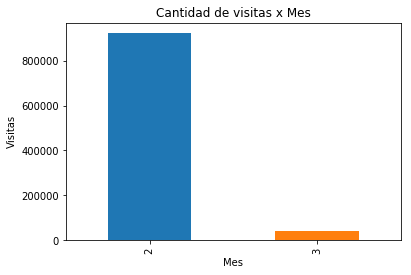

In [96]:
#este grafico no tiene mucho sentido porque no hay casi datos de marzo
#cambiar 2 y 3 por febrero y marzo
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('Cantidad de visitas x Mes')
ax.set_xlabel('Mes')
ax.set_ylabel('Visitas')
visitas['timestamp'].dt.month.value_counts().sort_index().plot(kind='bar')

plt.show()

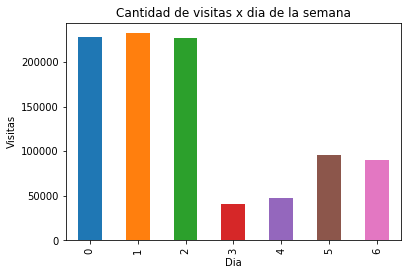

In [97]:
#agregar nombre de los dias de la semana
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('Cantidad de visitas x dia de la semana')
ax.set_xlabel('Dia')
ax.set_ylabel('Visitas')
visitas['timestamp'].dt.weekday.value_counts().sort_index().plot(kind='bar')

plt.show()

# Analisis mas complejo de datos
Aca irian todos los analisis de los merge de los dataframes
Anoto un par de ejemplos aca :

- tipos de trabajo con mas postulantes por edad
- tipos de trabajo con mas postulantes graduados
- tipos de trabajo con mas postulantes estudiantes
- tipos de trabajo con mas postulantes estudiantes de secundario
- tipos de trabajo con mas postulantes estudiantes universitarios
- empresas con mas postulantes por edad
- empresas con mas postulantes graduados
- titulos de avisos con mas postulantes por edad
- zonas con mas postulantes por edad
- zonas con mas postulantes estudiantes universitarios
- areas de trabajo con mas postulantes por edad
- areas de trabajo con mas postulantes graduados
- areas de trabajo con mas postulantes estudiantes
- areas de trabajo con mas postulantes estudiantes universitarios

- nivel laboral con mas postulantes graduados
- nivel laboral con mas postulantes estudiantes


In [98]:
#avisos con mayor cantidad de postulantes
cantidad_postulaciones = postulaciones.groupby('idaviso').agg({'idpostulante':'count'}).sort_values('idpostulante',ascending = False).rename(columns={"idpostulante": "cantidad_postulantes"})
cantidad_postulaciones = cantidad_postulaciones.reset_index()
avisos_cantidad_postulantes = pd.merge(cantidad_postulaciones,avisos_detalle, on= 'idaviso', how='inner') 
avisos_cantidad_postulantes.sort_values('cantidad_postulantes',ascending= False)

,idaviso,cantidad_postulantes,idpais,titulo,descripcion,nombre_zona,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,1112033906,9932,1,Cajero/a-Repositor/a (Capital Federal),<p>Te estamos buscando para formar parte de nu...,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Ventas,Farmacity
1,1112334791,9787,1,Cajero/a - Part Time,<p>Te estamos buscando para formar parte de un...,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Comercial,Farmacity
2,1112204682,9244,1,Cajero/a - Part Time,<p>Te estamos buscando para formar parte de un...,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Comercial,Farmacity
3,1112094756,8763,1,Representante de Atencion al Cliente/ Banco,<p>Seleccionaremos para Importante Entidad Ban...,Gran Buenos Aires,Part-time,Senior / Semi-Senior,Call Center,RANDSTAD
4,1112345900,8304,1,Asesores de Atención al Público - Part time,<p><em><strong>¡Sumate al equipo UP!</strong><...,Capital Federal,Part-time,Junior,Atención al Cliente,Universidad de Palermo
5,1112319451,8025,1,Cajera/o (Capital Federal / Zona Norte),<p><strong>¡En FRÁVEGA tenemos nuevas OPORTUNI...,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Créditos y Cobranzas,Frávega
6,1112298966,7637,1,Representante de Atención al Cliente - Call C...,"<p><span lang=""ES"" style="""">Incorporaremos a n...",Gran Buenos Aires,Full-time,Junior,Call Center,Fundación Favaloro
7,1112262494,7541,1,OPERADORES TELEFÓNICOS DE ATENCIÓN AL CLIENTE,"<p style="""">Buscamos Operadores Telefónicos pa...",Gran Buenos Aires,Part-time,Senior / Semi-Senior,Atención al Cliente,BBVA Francés
8,1112305277,7153,1,CAJERO/A PART TIME - CABA,<p>Orientamos nuestra búsqueda a estudiantes ...,Gran Buenos Aires,Full-time,Junior,Tesorería,BBVA Francés
9,1112296264,6968,1,Recepcionista Administrativa - Part Time,<p>Entre sus tareas mas importantes se encuent...,Gran Buenos Aires,Full-time,Junior,Recepcionista,Roilands Real Estate


In [99]:
merge2 = pd.merge(postulaciones,avisos_detalle,on="idaviso",how="left")

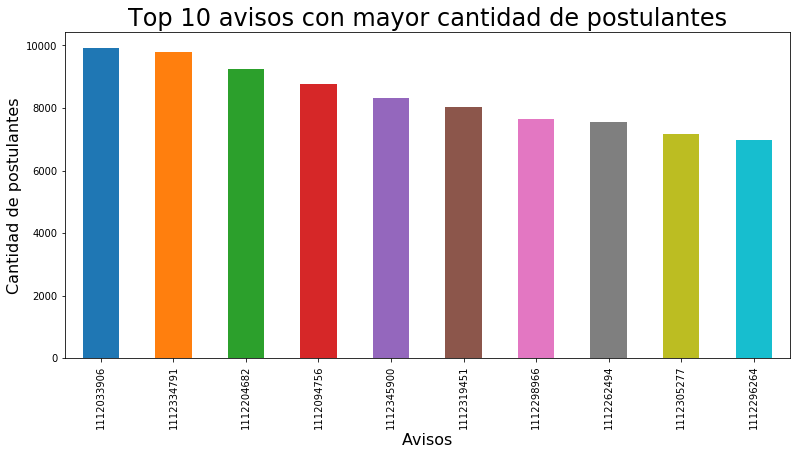

In [100]:
#aca en realidad querria saber el titulo del aviso
#no se que tan relevante seria este grafico igual

fig = plt.figure()

ax = merge2['idaviso'].value_counts().head(10).plot(kind='bar',figsize=(13,6));

plt.title('Top 10 avisos con mayor cantidad de postulantes', fontsize=24)

ax.set_xlabel('Avisos', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

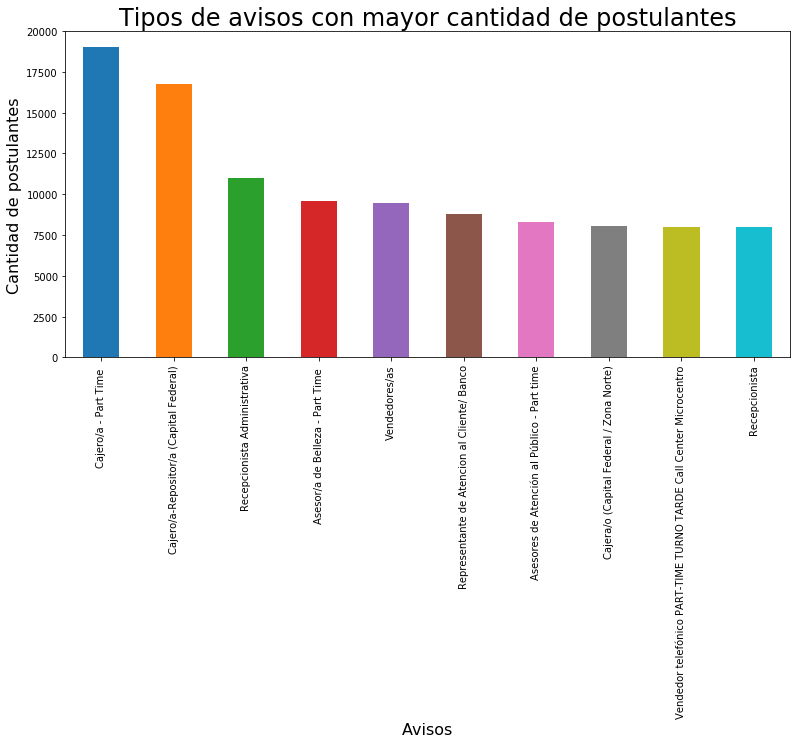

In [101]:
fig = plt.figure()

ax = merge2['titulo'].value_counts().head(10).plot(kind='bar',figsize=(13,6));

plt.title('Tipos de avisos con mayor cantidad de postulantes', fontsize=24)

ax.set_xlabel('Avisos', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

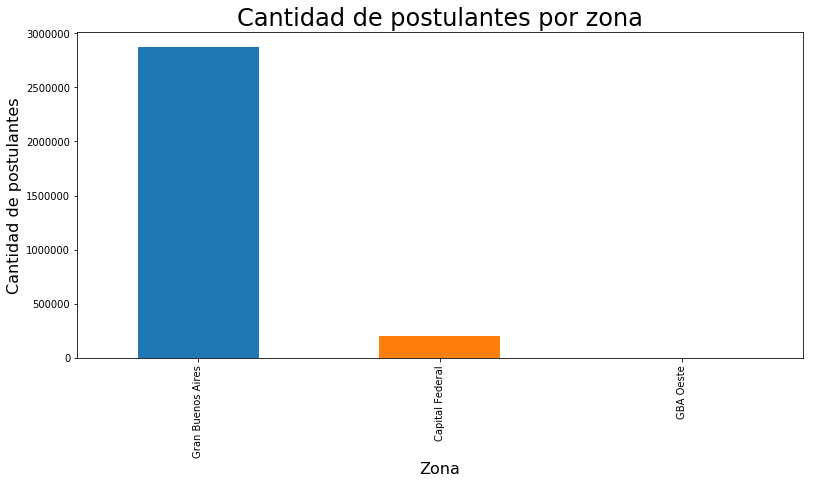

In [102]:
fig = plt.figure()

ax = merge2['nombre_zona'].value_counts().plot(kind='bar',figsize=(13,6));

plt.title('Cantidad de postulantes por zona', fontsize=24)

ax.set_xlabel('Zona', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

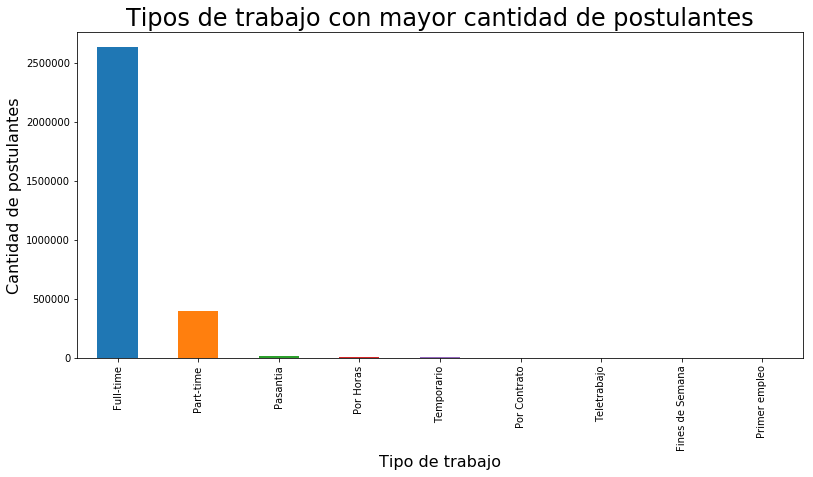

In [103]:
fig = plt.figure()

ax = merge2['tipo_de_trabajo'].value_counts().plot(kind='bar',figsize=(13,6));

plt.title('Tipos de trabajo con mayor cantidad de postulantes', fontsize=24)

ax.set_xlabel('Tipo de trabajo', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

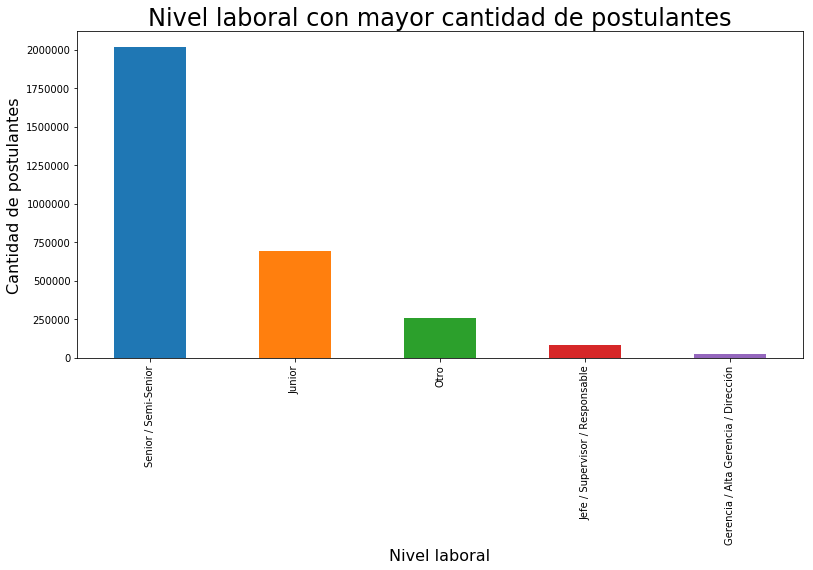

In [104]:
fig = plt.figure()

ax = merge2['nivel_laboral'].value_counts().plot(kind='bar',figsize=(13,6));

plt.title('Nivel laboral con mayor cantidad de postulantes', fontsize=24)

ax.set_xlabel('Nivel laboral', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

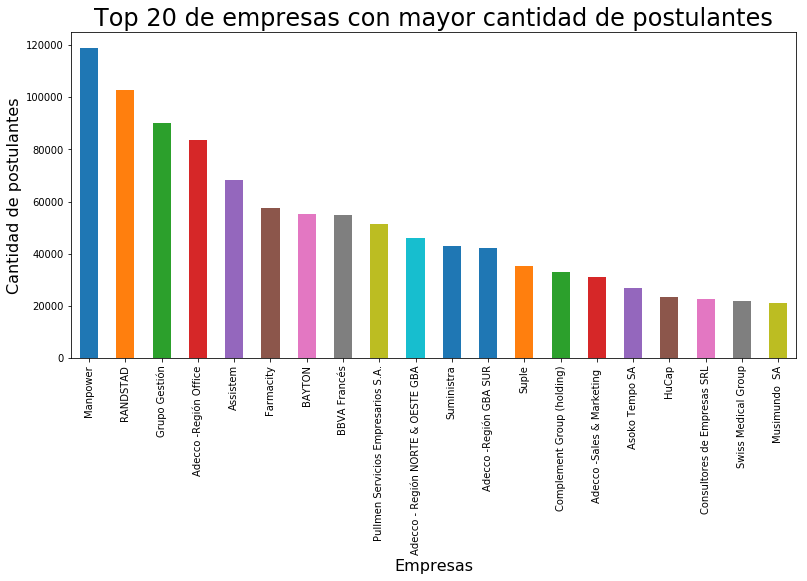

In [105]:
fig = plt.figure()

ax = merge2['denominacion_empresa'].value_counts().head(20).plot(kind='bar',figsize=(13,6));

plt.title('Top 20 de empresas con mayor cantidad de postulantes', fontsize=24)

ax.set_xlabel('Empresas', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

In [106]:
postulantes_genero_avisos = pd.merge(merge2,p_genero,on="idpostulante",how="left")

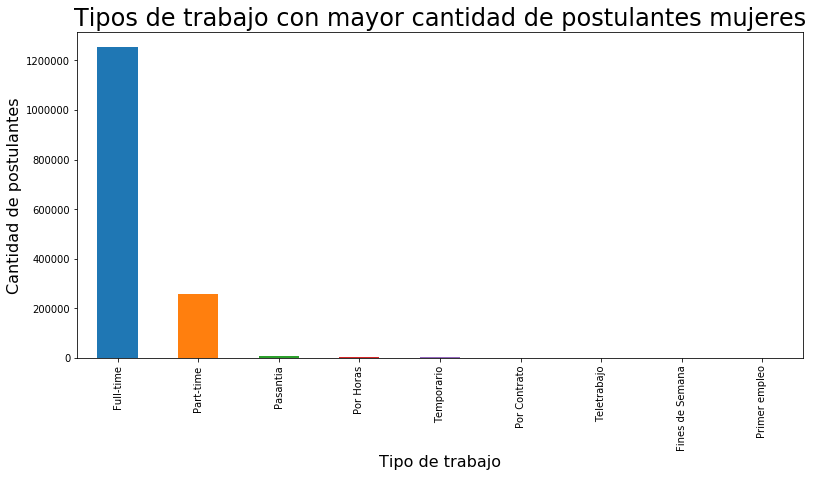

In [107]:
fig = plt.figure()

filtered=postulantes_genero_avisos.loc[(postulantes_genero_avisos.sexo=='FEM')]

ax = filtered['tipo_de_trabajo'].value_counts().plot(kind='bar',figsize=(13,6));

plt.title('Tipos de trabajo con mayor cantidad de postulantes mujeres', fontsize=24)

ax.set_xlabel('Tipo de trabajo', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

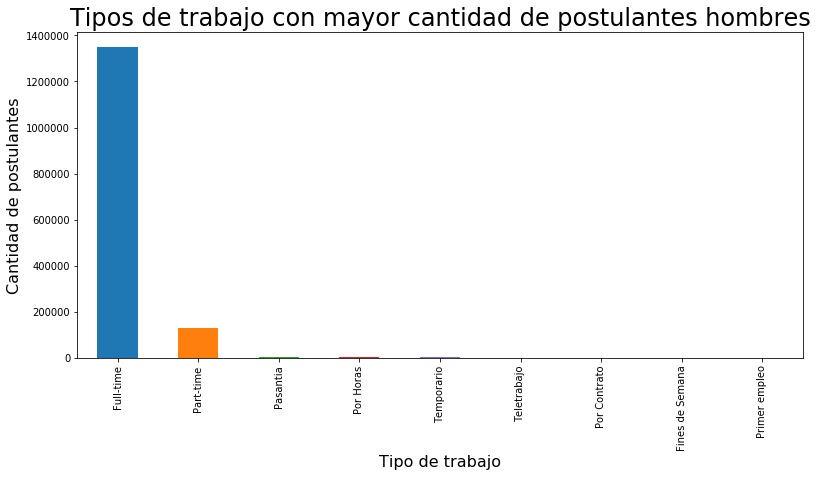

In [108]:
fig = plt.figure()

filtered=postulantes_genero_avisos.loc[(postulantes_genero_avisos.sexo=='MASC')]

ax = filtered['tipo_de_trabajo'].value_counts().plot(kind='bar',figsize=(13,6));

plt.title('Tipos de trabajo con mayor cantidad de postulantes hombres', fontsize=24)

ax.set_xlabel('Tipo de trabajo', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

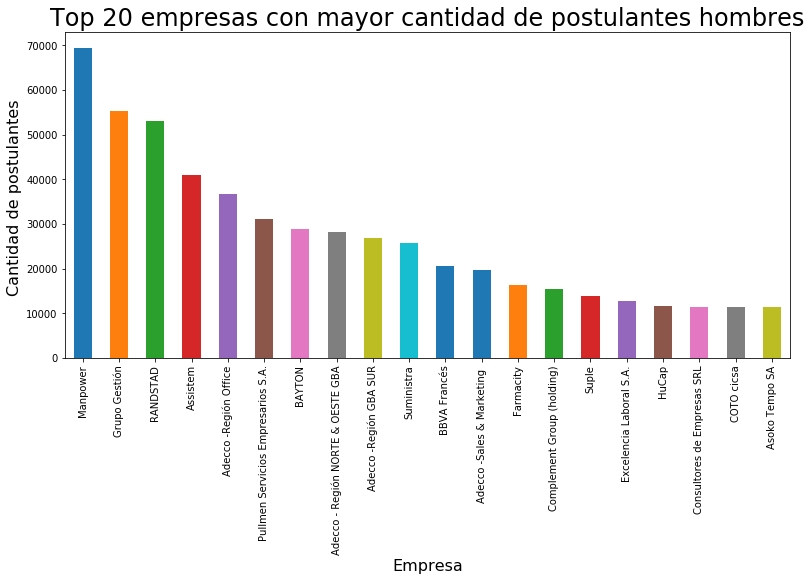

In [109]:
fig = plt.figure()

filtered=postulantes_genero_avisos.loc[(postulantes_genero_avisos.sexo=='MASC')]

ax = filtered['denominacion_empresa'].value_counts().head(20).plot(kind='bar',figsize=(13,6));

plt.title('Top 20 empresas con mayor cantidad de postulantes hombres', fontsize=24)

ax.set_xlabel('Empresa', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes ', fontsize= 16);

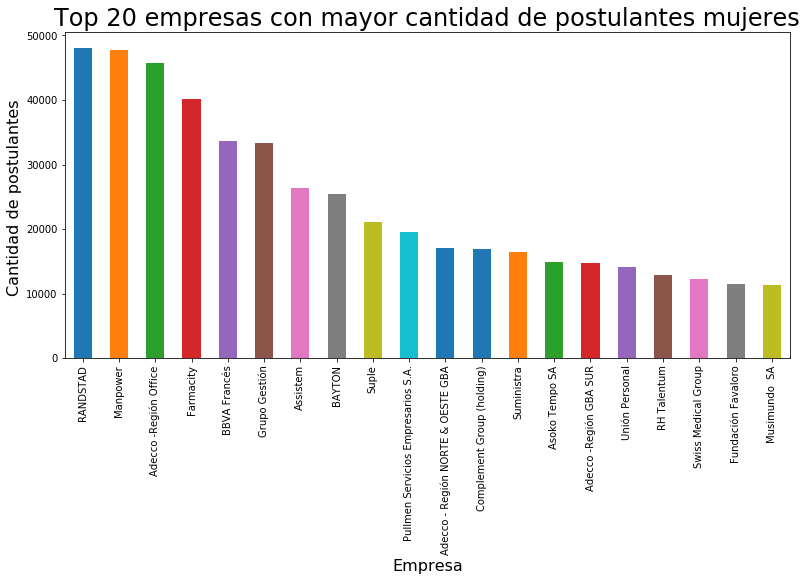

In [110]:
fig = plt.figure()

filtered=postulantes_genero_avisos.loc[(postulantes_genero_avisos.sexo=='FEM')]

ax = filtered['denominacion_empresa'].value_counts().head(20).plot(kind='bar',figsize=(13,6));

plt.title('Top 20 empresas con mayor cantidad de postulantes mujeres', fontsize=24)

ax.set_xlabel('Empresa', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes ', fontsize= 16);

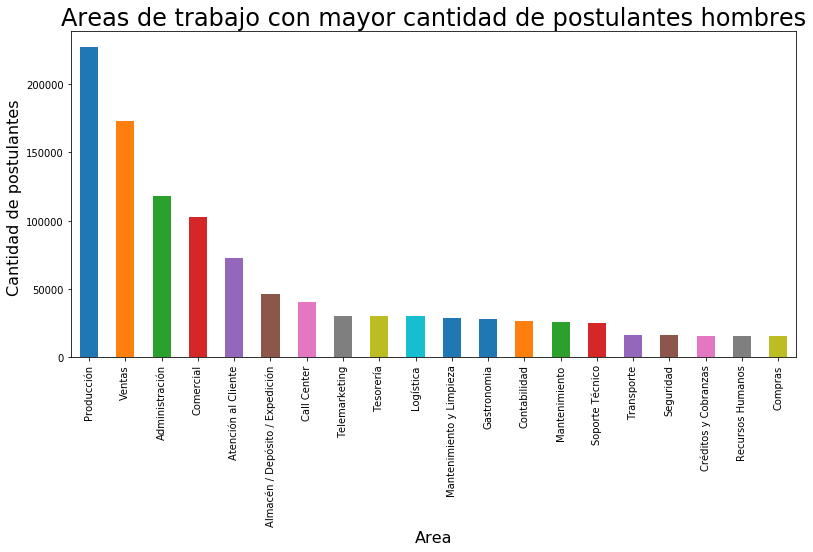

In [111]:
fig = plt.figure()

filtered=postulantes_genero_avisos.loc[(postulantes_genero_avisos.sexo=='MASC')]

ax = filtered['nombre_area'].value_counts().head(20).plot(kind='bar',figsize=(13,6));

plt.title('Areas de trabajo con mayor cantidad de postulantes hombres', fontsize=24)

ax.set_xlabel('Area', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes ', fontsize= 16);

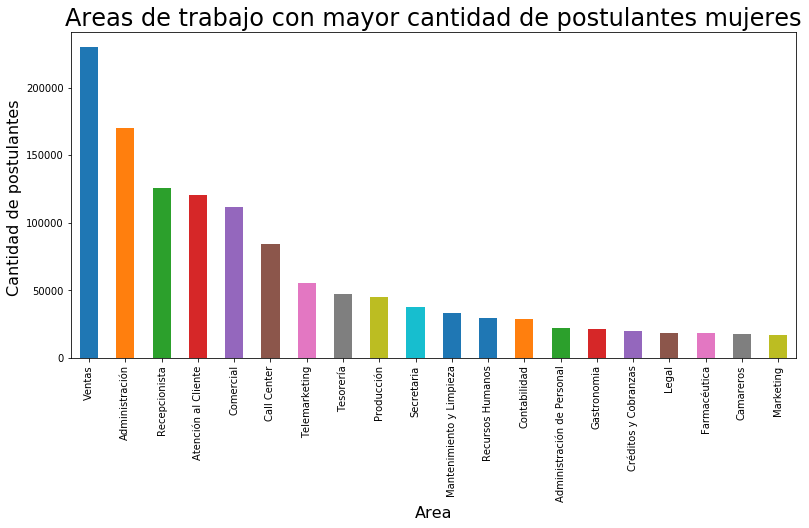

In [112]:
fig = plt.figure()

filtered=postulantes_genero_avisos.loc[(postulantes_genero_avisos.sexo=='FEM')]

ax = filtered['nombre_area'].value_counts().head(20).plot(kind='bar',figsize=(13,6));

plt.title('Areas de trabajo con mayor cantidad de postulantes mujeres', fontsize=24)

ax.set_xlabel('Area', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes ', fontsize= 16);

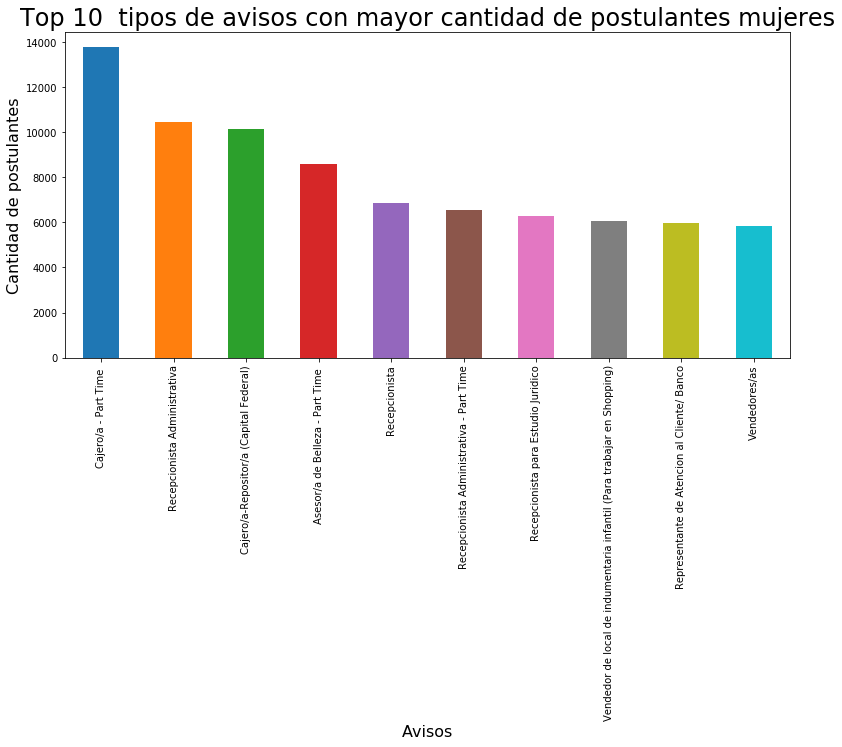

In [113]:
fig = plt.figure()

filtered=postulantes_genero_avisos.loc[(postulantes_genero_avisos.sexo=='FEM')]

ax = filtered['titulo'].value_counts().head(10).plot(kind='bar',figsize=(13,6));

plt.title('Top 10  tipos de avisos con mayor cantidad de postulantes mujeres', fontsize=24)

ax.set_xlabel('Avisos', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

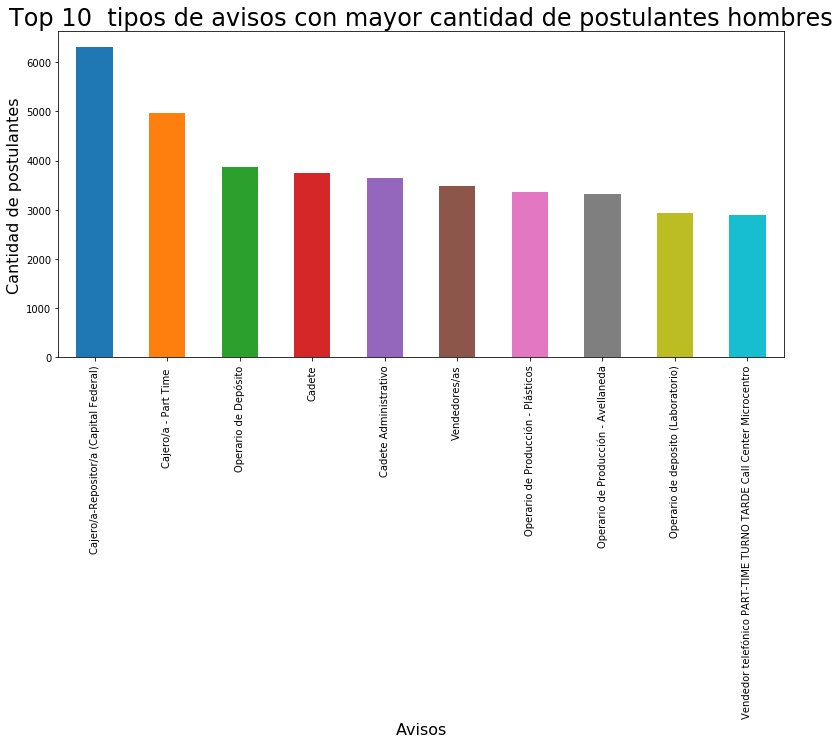

In [114]:
fig = plt.figure()

filtered=postulantes_genero_avisos.loc[(postulantes_genero_avisos.sexo=='MASC')]

ax = filtered['titulo'].value_counts().head(10).plot(kind='bar',figsize=(13,6));

plt.title('Top 10  tipos de avisos con mayor cantidad de postulantes hombres', fontsize=24)

ax.set_xlabel('Avisos', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

In [115]:
postulantes_edad_avisos = pd.merge(merge2,p_edad,on="idpostulante",how="inner")

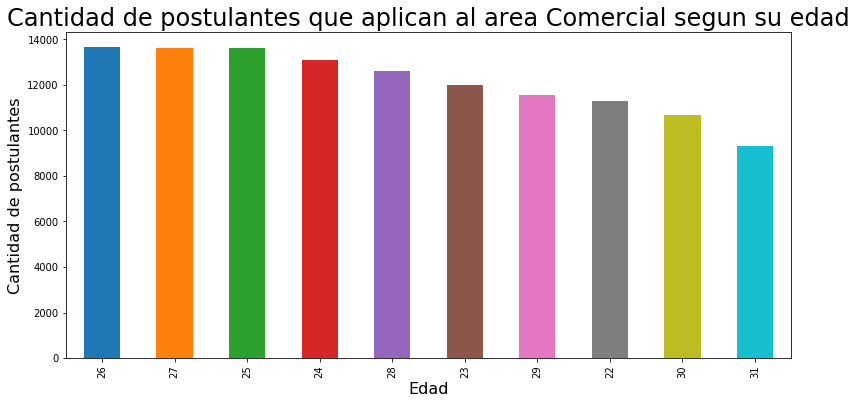

In [116]:
#aca iria otro tipo de grafico
filtered = postulantes_edad_avisos.loc[(postulantes_edad_avisos.nombre_area=='Comercial')]

fig = plt.figure()

ax = filtered['edad'].value_counts().head(10).plot(kind='bar',figsize=(13,6));

plt.title('Cantidad de postulantes que aplican al area Comercial segun su edad', fontsize=24)

ax.set_xlabel('Edad', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

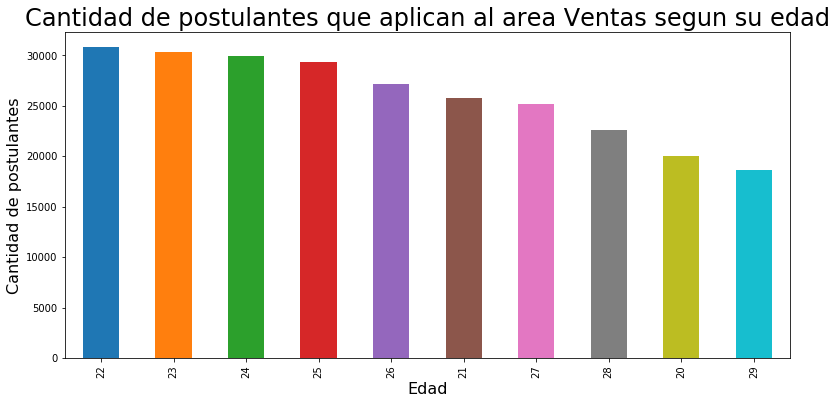

In [117]:
#aca iria otro tipo de grafico
filtered = postulantes_edad_avisos.loc[(postulantes_edad_avisos.nombre_area=='Ventas')]

fig = plt.figure()

ax = filtered['edad'].value_counts().head(10).plot(kind='bar',figsize=(13,6));

plt.title('Cantidad de postulantes que aplican al area Ventas segun su edad', fontsize=24)

ax.set_xlabel('Edad', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

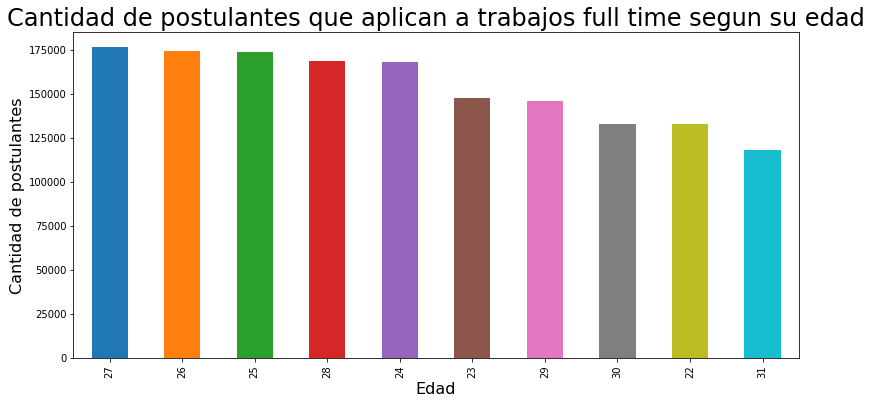

In [118]:
filtered = postulantes_edad_avisos.loc[(postulantes_edad_avisos.tipo_de_trabajo=='Full-time')]

fig = plt.figure()

ax = filtered['edad'].value_counts().head(10).plot(kind='bar',figsize=(13,6));

plt.title('Cantidad de postulantes que aplican a trabajos full time segun su edad', fontsize=24)

ax.set_xlabel('Edad', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

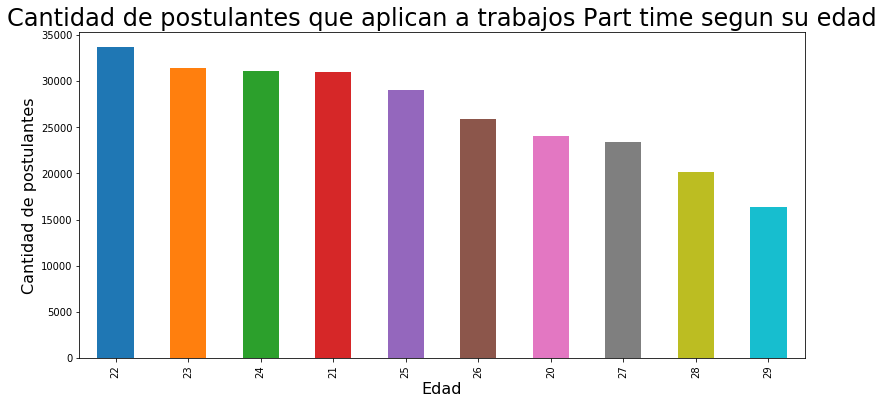

In [119]:
filtered = postulantes_edad_avisos.loc[(postulantes_edad_avisos.tipo_de_trabajo=='Part-time')]

fig = plt.figure()

ax = filtered['edad'].value_counts().head(10).plot(kind='bar',figsize=(13,6));

plt.title('Cantidad de postulantes que aplican a trabajos Part time segun su edad', fontsize=24)

ax.set_xlabel('Edad', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

# Top 5 - Postulaciones x Area de trabajo

In [120]:
df = pd.merge(postulaciones, avisos_detalle, on='idaviso', how='inner')

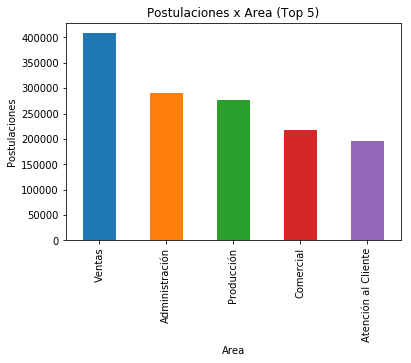

In [121]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.title('Postulaciones x Area (Top 5)')
ax.set_xlabel('Area')
ax.set_ylabel('Postulaciones')
df['nombre_area'].value_counts().head().plot(kind='bar')

plt.show()

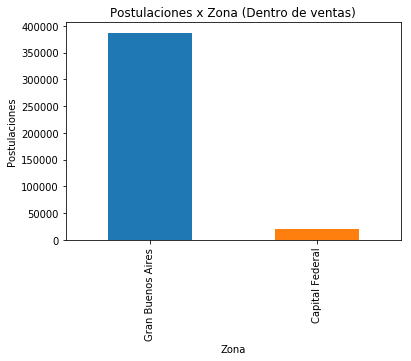

In [122]:
#este me tira un memory error
fig = plt.figure()
ax = fig.add_subplot(111)

plt.title('Postulaciones x Zona (Dentro de ventas)')
ax.set_xlabel('Zona')
ax.set_ylabel('Postulaciones')
merge2[merge2['nombre_area'] == 'Ventas']['nombre_zona'].value_counts().plot(kind='bar')
plt.show()

# Tasa de conversion de avisos (postulaciones / visitas)

Agrego esto que puso natalia en Piazza para que lo lean. Por lo que vi, en el csv de vistas no hay idUsuario null, por lo que entiendo que en este csv solo tenemos las vistas de los usuarios que estaba logeados antes de postularse.
Entonces puede pasar que tengamos postulaciones de usuarios pero que no tengamos las vistas previas a la postulacion.
Tambien tenemos que chequear y limpiar que en las vistas seguramente hay usuarios duplicados.

Natalia Golmar 10 hours ago
Hola

Consulte este tema con la gente de Navent, y les comparto algunas respuestas:

- Las vistas se guardan solo para usuarios logueados en el sistema? No, se guardan todas las vistas y si el usuario no está logueado en el registro no tiene el campo idUsuario (no recuerdan si filtraron y nos enviaron sólo las vistas con usuarios, pero si es asi entiendan que seguro hay vistas sin idUsuario para los avisos)
- Es posible mirar avisos sin loguearse? Si
- Es posible que el usuario se loguee solo al postularse, y no quede registado el acceso al aviso como vista? Si
- Si un usuario visita mas de una vez un aviso, se registra cada vista o se registra solo la 1ra? Todas

In [123]:
postulaciones.head()

,idaviso,idpostulante,fechapostulacion,dia_semana,mes_postulacion
0,1112257047,NM5M,2018-01-15 16:22:34,Monday,1
1,1111920714,NM5M,2018-02-06 09:04:50,Tuesday,2
2,1112346945,NM5M,2018-02-22 09:04:47,Thursday,2
3,1112345547,NM5M,2018-02-22 09:04:59,Thursday,2
4,1112237522,5awk,2018-01-25 18:55:03,Thursday,1


In [124]:
#me quedo con la fecha de la postulacion
postulaciones['fechapostulacion'] = postulaciones['fechapostulacion'].dt.date

In [125]:
#lo mismo para el timestamp
visitas['timestamp'] = visitas['timestamp'].dt.date

In [126]:
postulaciones_validas = postulaciones[postulaciones['fechapostulacion'].isin(visitas['timestamp'])]

In [127]:
visitas_validas = visitas[visitas['timestamp'].isin(postulaciones_validas['fechapostulacion'])]

In [128]:
visitas_validas['timestamp'].value_counts()

2018-02-27    232145
2018-02-26    227957
2018-02-28    227160
2018-02-24     95930
2018-02-25     90646
2018-02-23     47236
Name: timestamp, dtype: int64

In [129]:
postulaciones_validas['fechapostulacion'].value_counts()

2018-02-26    122688
2018-02-27    119845
2018-02-28    118296
2018-02-23     85024
2018-02-25     49924
2018-02-24     43718
Name: fechapostulacion, dtype: int64

In [130]:
postulaciones_validas = postulaciones_validas.rename(columns={'fechapostulacion':'fecha'})
postulaciones_validas.head()

,idaviso,idpostulante,fecha,dia_semana,mes_postulacion
12,1112315188,5awk,2018-02-28,Wednesday,2
13,1112346738,5awk,2018-02-28,Wednesday,2
14,1112330625,5awk,2018-02-28,Wednesday,2
15,1112306543,5awk,2018-02-28,Wednesday,2
16,1112315170,5awk,2018-02-28,Wednesday,2


In [131]:
visitas_validas = visitas_validas.rename(columns={'idAviso':'idaviso','timestamp':'fecha'})
visitas_validas.head()

,idaviso,fecha,idpostulante
0,1111780242,2018-02-23,YjVJQ6Z
1,1112263876,2018-02-23,BmVpYoR
2,1112327963,2018-02-23,wVkBzZd
3,1112318643,2018-02-23,OqmP9pv
4,1111903673,2018-02-23,DrpbXDP


In [132]:
vg = visitas_validas.groupby('idaviso').agg({'idpostulante':'count'})
vg = vg.reset_index()
pg = postulaciones_validas.groupby('idaviso').agg({'idpostulante':'count'})
pg = pg.reset_index()
tasa_convergencia = pd.merge(vg,pg,on='idaviso')

In [133]:
tasa_convergencia.head()

,idaviso,idpostulante_x,idpostulante_y
0,12543760,378,127
1,12812680,87,46
2,1000365835,29,14
3,1000375329,468,310
4,1000502125,18,8


In [134]:
tasa_media = tasa_convergencia['idpostulante_x'].sum() / tasa_convergencia['idpostulante_x'].count()

In [135]:
tasa_convergencia[tasa_convergencia['idpostulante_x'] > tasa_media].head()

,idaviso,idpostulante_x,idpostulante_y
0,12543760,378,127
3,1000375329,468,310
9,1000905002,523,251
18,1001442844,404,93
20,1002088629,417,171


In [136]:
tasa_convergencia['tasa'] = (tasa_convergencia['idpostulante_x'] / tasa_convergencia['idpostulante_y'])

In [137]:
tasa_convergencia.set_index('idaviso')['tasa'].sort_values(ascending=False).head()

idaviso
1112359511    64.0
1112361790    55.0
1112323023    31.0
1112361607    29.0
1112361795    25.0
Name: tasa, dtype: float64

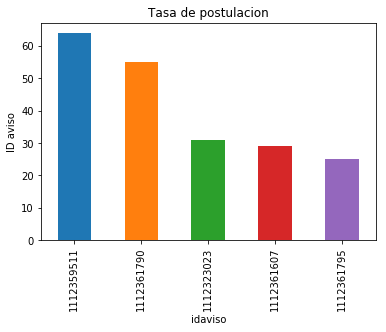

In [138]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Tasa de postulacion')
ax.set_xlabel('Tasa')
ax.set_ylabel('ID aviso')
tasa_convergencia.set_index('idaviso')['tasa'].sort_values(ascending=False).head().plot(kind='bar')
plt.show()

# Evolucion de cantidad de visitas por dia y el nivel de estudio de los postulantes

In [139]:
df_merge = pd.merge(p_educacion,visitas,on='idpostulante')

In [140]:
df_merge.groupby(['timestamp','estado']).agg({'idpostulante':'count'})

idpostulante
timestamp  estado                  
2018-02-23 Abandonado          5843
           En Curso           21202
           Graduado           44655
2018-02-24 Abandonado         12332
           En Curso           38125
           Graduado           90766
2018-02-25 Abandonado         12100
           En Curso           35545
           Graduado           85056
2018-02-26 Abandonado         29814
           En Curso           95526
           Graduado          220904
2018-02-27 Abandonado         29784
           En Curso           98423
           Graduado          222574
2018-02-28 Abandonado         28933
           En Curso           96810
           Graduado          216671
2018-03-01 Abandonado          5137
           En Curso           17992
           Graduado           38123

In [141]:
heap = df_merge.pivot_table(index='nombre',columns='timestamp',values='idpostulante',aggfunc='count')

In [142]:
heap

timestamp,2018-02-23,2018-02-24,2018-02-25,2018-02-26,2018-02-27,2018-02-28,2018-03-01
nombre,,,,,,,
Doctorado,20,49,61,341,199,277,58
Master,616,1593,1520,3454,3476,3082,482
Otro,5094,10362,9951,25854,24284,25200,4507
Posgrado,1424,3105,3319,8031,7642,7435,1035
Secundario,25295,52075,47840,123650,127534,124127,23200
Terciario/Técnico,11364,21626,20875,55468,56189,55462,9761
Universitario,27887,52413,49135,129446,131457,126831,22209


Text(0.5,1,'Evolucion de cantidad de visitas por dia y el nivel de estudio de los postulantes')

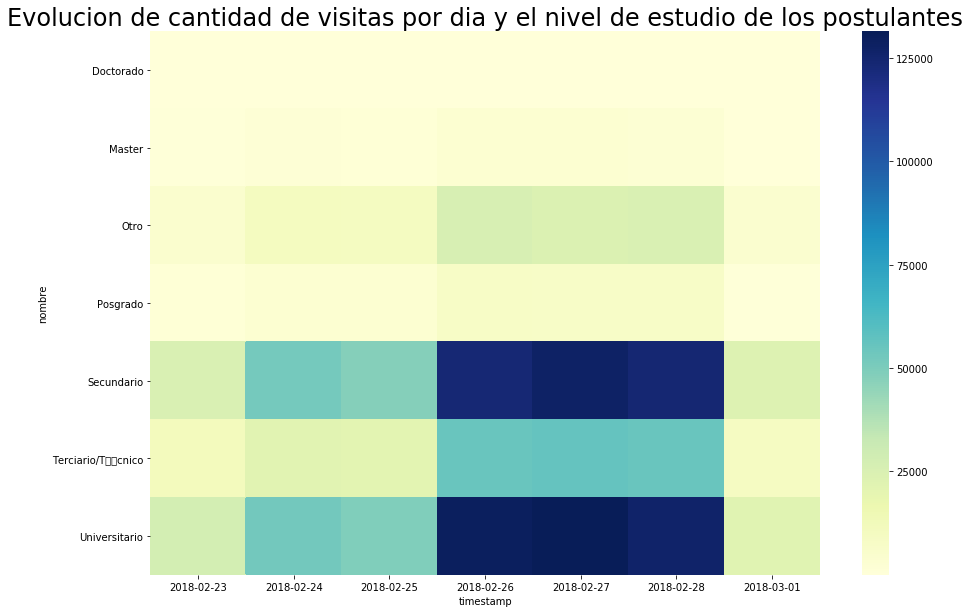

In [143]:
plt.subplots(figsize=(15,10))
g = sns.heatmap(heap, cmap='YlGnBu')
plt.title('Evolucion de cantidad de visitas por dia y el nivel de estudio de los postulantes', fontsize=24)

# Heatmap educacion x estado

In [144]:
heap = p_educacion.pivot_table(index='estado',columns='nombre',values='idpostulante',aggfunc='count')

In [145]:
heap

nombre,Doctorado,Master,Otro,Posgrado,Secundario,Terciario/Técnico,Universitario
estado,,,,,,,
Abandonado,15,144,947,317,3156,5692,14955
En Curso,94,1519,4919,2239,3995,15032,50733
Graduado,105,1935,18882,4831,103105,27009,38607


Text(0.5,1,'Cantidad de postulantes segun su educacion y estado')

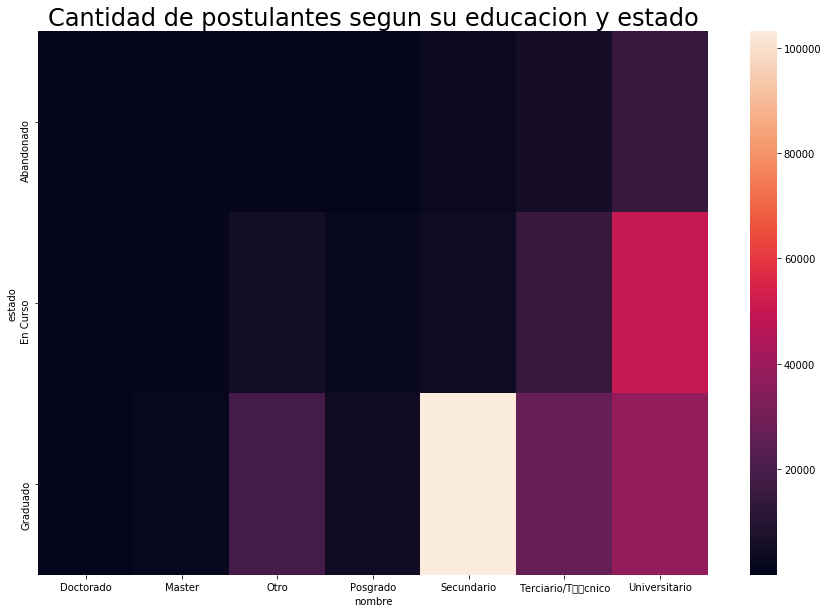

In [147]:
plt.subplots(figsize=(15,10))
g = sns.heatmap(heap)
plt.title('Cantidad de postulantes segun su educacion y estado', fontsize=24)